### Worked with Marc Suda


## HW 2

In this homework you will implement your first learning model:  the perceptron.  

<img src="https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="480">

If you haven't already, you should read the following sections from _Learning From Data_:

* 1.1.2, for the definition of the perceptron
* 1.4.1, for alternative error measures
* 3.1.1, for the pocket algorithm
* Page 21, for the definition of $E_{in}$

These slides may also be useful: [slides](http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect02.pdf)

Your job is to follow the instructions given in the cells below.

At the beginning and at some other places I will create some synthetic data for your perceptron to classify.

**Due: 2/26**

The collaboration policy is the same as HW1:  Up to three team members, with attribution.

Do not copy code from the internet for any part unless the assignment specifically says that it's okay.

---

Notes:  For this assigment (and for all linear classifiers) it's important that you add a "bias" column of ones to $X$ and that the two possible classifications be $+1$ and $-1$.

I've probably done this for you, just note where it happens and be careful.


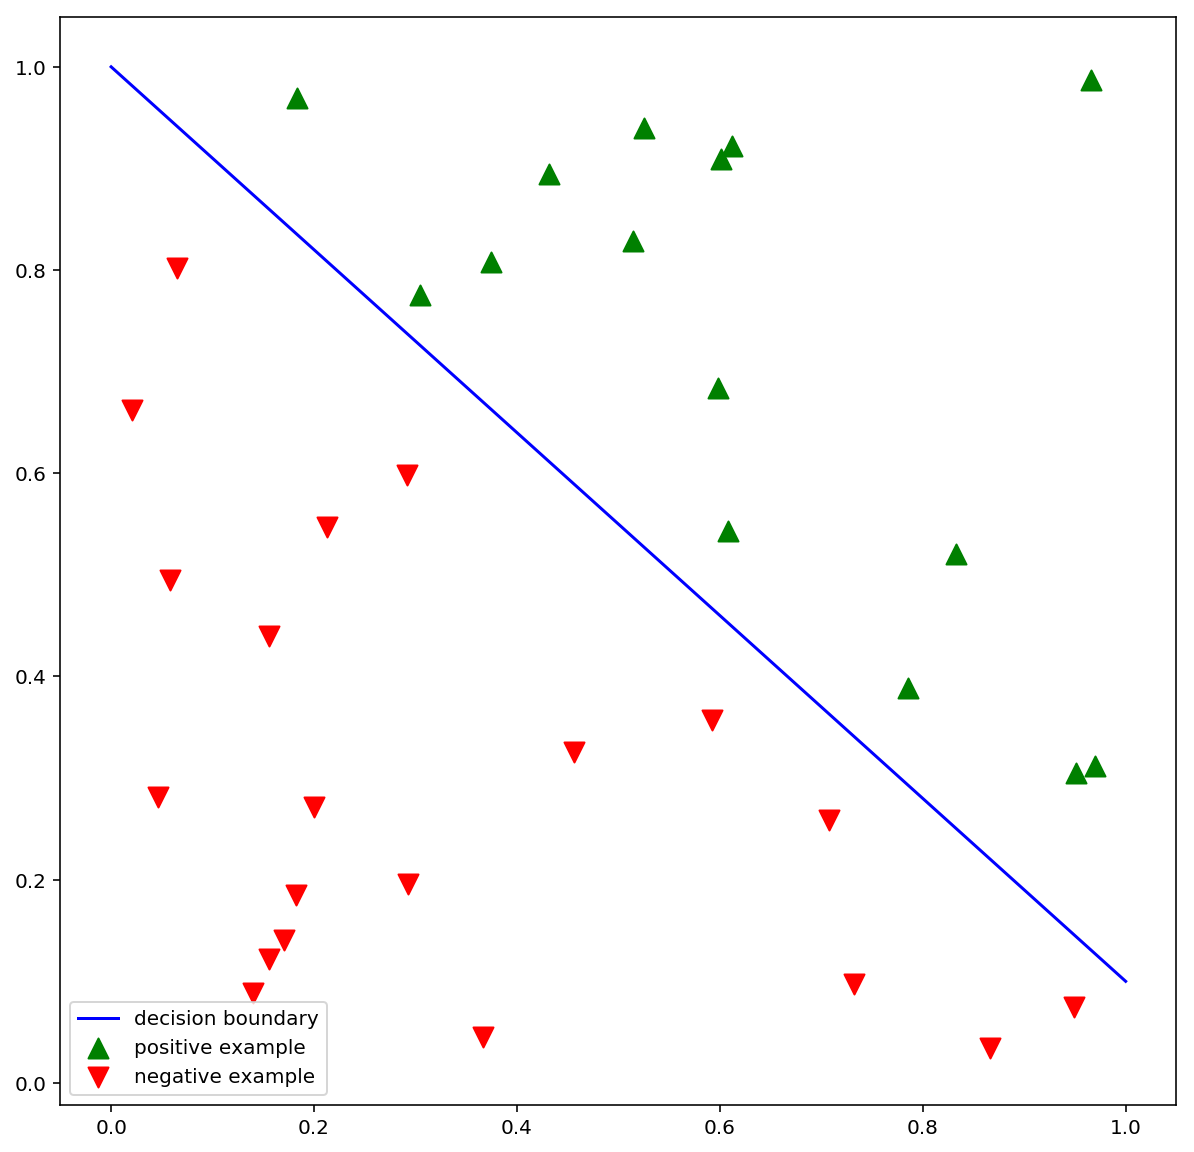

In [1]:
## Producing synthetic data
"""
In this cell we create 35 points at random.
We separate them with a line to create linearly separable data.
The data is stored in the points array.
Note that the first column of the points array is a "bias" column of all ones.
The "line _coef" (coefficients) variable works like this:
    if line_coef = (a,b,c)
    then this describes the line
    0 = a + bx + cy
This line can be thought of as the intersection of the plane
    z = a + bx + cy
with the xy plane.
Observe that in 
    0 = a + bx + cy
there are really only two degrees of freedom, because we can divide everything by c to get

    0 = A + Bx + y
where A = a/c and B = b/c.
(This assumes c != 0, but this assumption will almost always be true.)
"""

import numpy as np
import matplotlib.pyplot as plt

N = 35 # number of points
np.random.seed(42)  # So that everyone has the same "random" points
points = np.zeros(3*N).reshape(N,3)
points[:,1] = np.random.rand(N) #random x-coordinates
points[:,2] = np.random.rand(N) #random y-coordinates
points[:,0] = np.ones(N)        #bias column

line_coef = (-1,0.9,1)          #this line will define whether a point is a positive or negative example
pos = points.dot(line_coef) >= 0  # positive examples are above the line
neg = ~pos   # negative examples are below the line
"""
Question:  do you understand what pos and neg are, and how they work?
           you might want to print them out and experiment with them.
           we use them to select out certain rows of a numpy array.
           if this is confusing read the section here about 
           Boolean or "mask" index arrays:
           https://docs.scipy.org/doc/numpy-1.10.0/user/basics.indexing.html
"""


x = np.linspace(0,1)                # domain of decision boundary line
y = -line_coef[1]*x - line_coef[0]  # this is the decision boundary line

"""
A note about colors... I used "green" for "positive example" and "red" for "negative example".
If you happen to be red green colorblind (like 8% of all men) then please feel free to change the colors.
"""

plt.figure(1,figsize=(10,10))
plt.scatter(points[pos,1],points[pos,2],c='green',marker="^",s=100,label="positive example")  #plot positive examples
plt.scatter(points[neg,1],points[neg,2],c='red',marker="v",s=100,label="negative example")  #plot negative examples
plt.plot(x,y,'b',label="decision boundary")  #plot linear separator
plt.legend()
plt.show()

Now we want to "forget" the decision boundary and re-learn it from the data using the Perceptron Learning Algorithm (PLA).

In the cell below we define `X` to be the points (along with bias column) and make `y` the corresponding classifications made by the decision boundary.

Recall from the book that each `y` entry should be $\pm 1$.


In [2]:

y = np.ones(N)
y[neg] = -1
y[pos] = 1
X = points

## Part 1

Below is an outline of the PLA algorithm.

Fill in the "while loop" part.

The while loop should yield a weight vector `w` which makes the same decisions on X as the original decision boundary.

---

**Note:** Your code should work regardless of the dimensions of `X` and `y`.  Don't code in any magic numbers.

If you find yourself writing a repeat loop in python (other than the given while loop) then you are doing something wrong.

You should be using a matrix operation instead, like `X.dot(w)` or something.

Use boolean indexing to find misclassified points.  

Hint:  What is this?

    np.argmax([False,True,False])


In [3]:


def PLA(X,y,iterations=2000):
    """ 
    X: an Nx(d+1) matrix of datapoints with bias column
    y: a Nx1 vector of classifications in {-1,1}
    iterations: the maximum number of iterations
    description:  Applies the perceptron learning algorithm to X,y for given number of iterations
    returns: learned weight vector
    """ 
    
    assert(iterations >= 0)
    w = np.random.rand(X.shape[1]) # random initial weights
    _iterations = 0

    while(_iterations < iterations):
        #Part 1 worked with Marc Suda from class
        A = np.sign(X.dot(w))!=y
        if not (np.sign(X.dot(w))==y).all():
            #if a x gets misclassified, update weights
            t = np.argmax(A)
            w= w + y[t]*X[t]
            _iterations += 1
        else:
            break
    
    
    print(f"Done in {_iterations} iterations")
    print(np.sign(X.dot(w)))
    return w

In [4]:

w = PLA(X,y,2000)
wp = w/w[-1]  # dividing out c as described in comments to first code cell
print(w)

Done in 63 iterations
[ 1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1.
  1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1.]
[-4.22775523  3.14065521  4.87425725]


## Checking your work

The following code will plot your decision boundary together with the original decision boundary.

The result should look something like this:

![img](wtf.png)

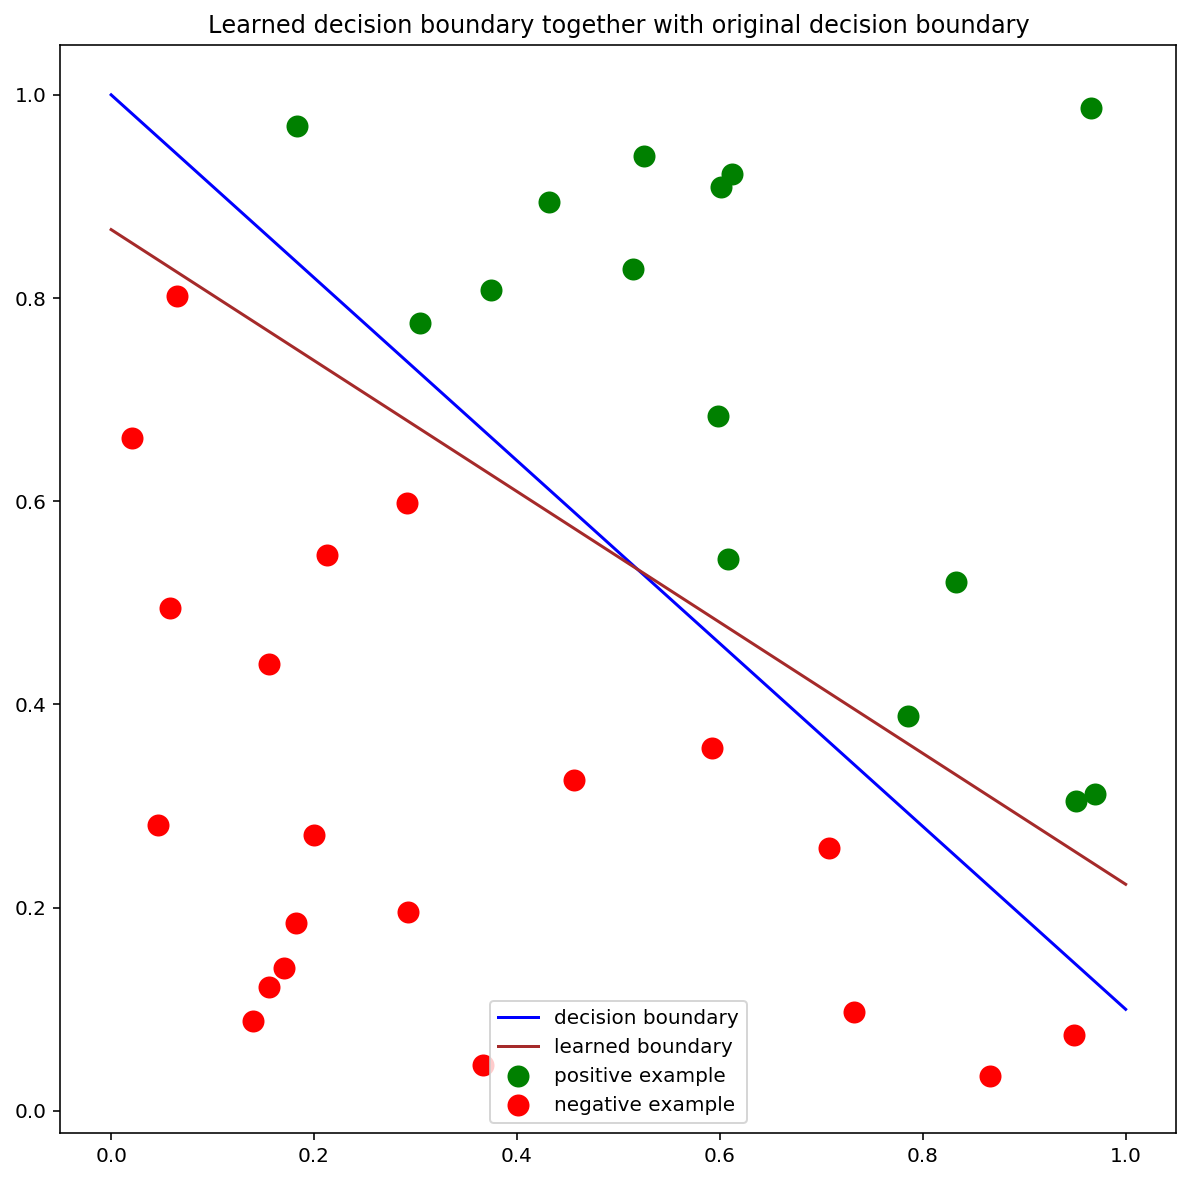

In [5]:

line_coef = (-1,0.9,1)
pos = points.dot(line_coef) >= 0
neg = points.dot(line_coef) < 0


x = np.linspace(0,1)
yy = -line_coef[1]*x - line_coef[0]  
yh = -wp[1]*x - wp[0]

plt.figure(1,figsize=(10,10))
plt.title("Learned decision boundary together with original decision boundary")

plt.scatter(points[pos,1],points[pos,2],c='green',s=100,label="positive example")  #plot positive examples
plt.scatter(points[neg,1],points[neg,2],c='red',s=100,label="negative example")  #plot negative examples
plt.plot(x,yy,'b',label="decision boundary")  #plot linear separator
plt.plot(x,yh,'brown',label="learned boundary")  #plot linear separator
plt.legend()
plt.show()

### Non linearly-separable data

The way we used the perceptron to learn the decision boundary was artificially easy.

It's almost never the case that real data can actually be classified perfectly using a line as a decision boundary.  

In this part of the assignment we will implement the Pocket Algorithm to learn a decision boundary that does a good job of classifying data that is not quite linearly separable.  

The pocket algorithm is described on pg. 80 of the _Learning From Data_ book.

First we make the data.


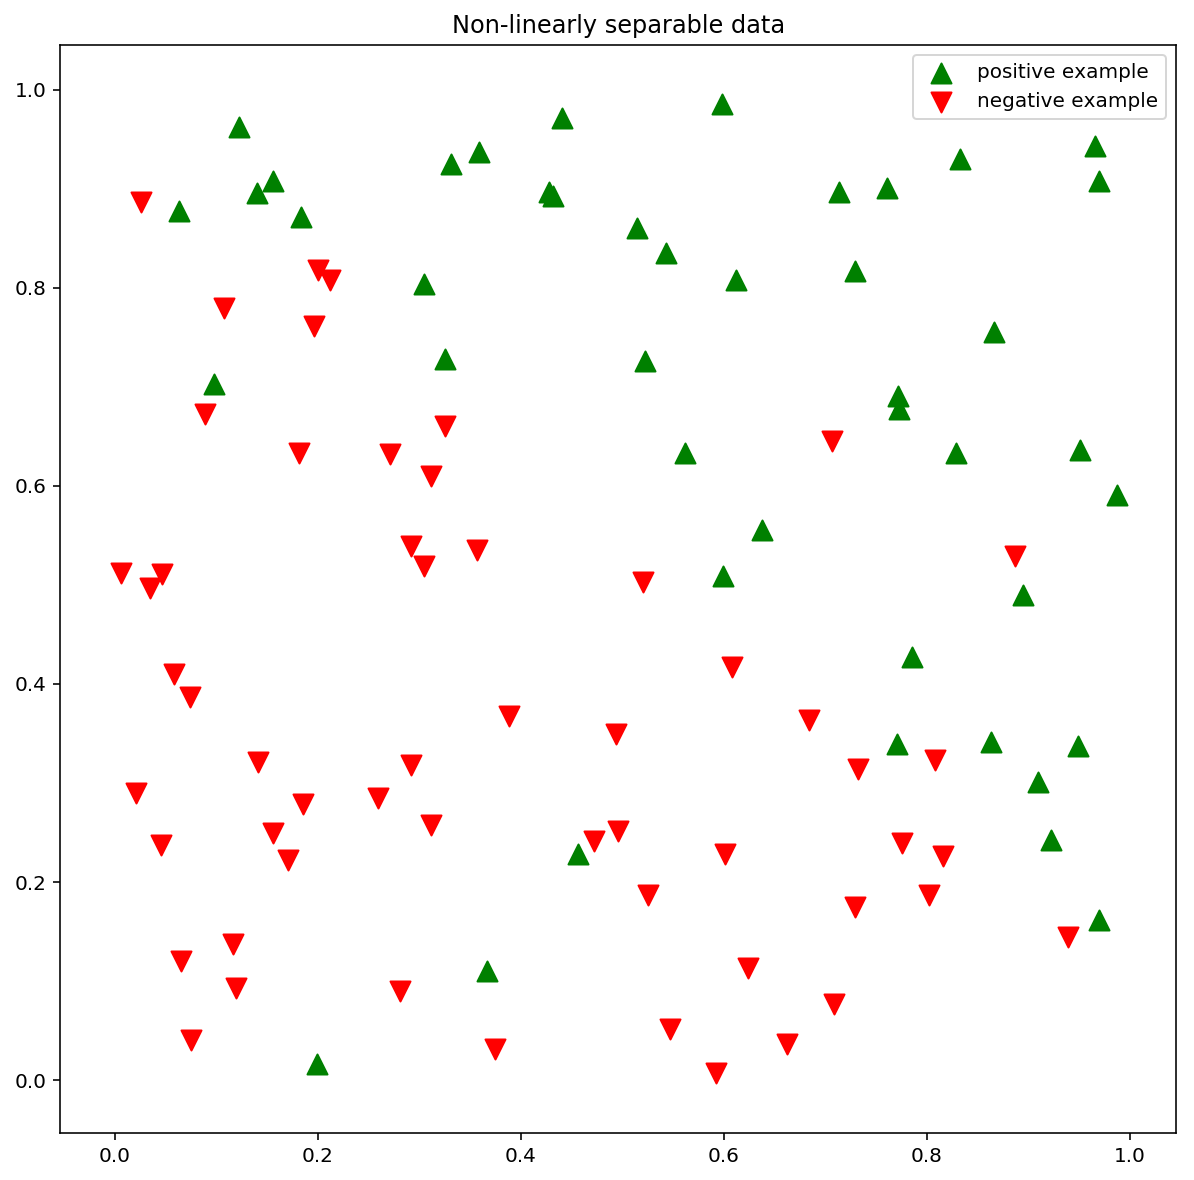

In [6]:
N = 100 # number of points
np.random.seed(42)  # So that everyone has the same "random" points
points = np.zeros(3*N).reshape(N,3)
points[:,1] = np.random.rand(N) #random x-coordinates
points[:,2] = np.random.rand(N) #random y-coordinates
points[:,0] = np.ones(N)        #bias column

line_coef = (-1,0.9,1)          #this line will define whether a point is a positive or negative example
pos = points.dot(line_coef) >= 0  # positive examples are above the line

for i in range(N//10):  # Now we flip about 10% of the data (could be less b/c collisions)
    r = np.random.randint(len(pos))
    pos[r] = ~pos[r]    # Flip the truth condition
    
neg = ~pos   # negative examples are below the line (except for flipped ones)

x = np.linspace(0,1)                # domain of decision boundary line
y = -line_coef[1]*x - line_coef[0]  # this is the decision boundary line

plt.figure(1,figsize=(10,10))
plt.scatter(points[pos,1],points[pos,2],c='green',marker="^",s=100,label="positive example")  #plot positive examples
plt.scatter(points[neg,1],points[neg,2],c='red',s=100,marker="v",label="negative example")  #plot negative examples
#plt.plot(x,y,'b',label="decision boundary")  #plot linear separator
plt.legend()
plt.title("Non-linearly separable data")
plt.show()

### Parts 2 and 3

In the code below please fill in the missing part of the pocket algorithm.

Also implement the `E_in` function (see p. 21 and p. 80).

Hint:  What is this?

    np.mean([True,False,False])

In [7]:
y = np.ones(N)
y[neg] = -1
y[pos] = 1
X = points

def E_in(X,w,y):
    k = np.sign(X.dot(w))!=y #returns true or false
    e = (1/len(X)) * np.mean(k)
    return e

def Pocket_Algorithm(X,y,iterations=2000,E_in=E_in):
    
    
    assert(iterations >= 0)
    w = np.random.rand(X.shape[1]) # random initial weights
    least_error = E_in(X,w,y)
    w_hat = np.copy(w)  ## Be sure to make a deep copy
    _iterations = 0
    while(_iterations < iterations):
        _iterations += 1
        # Part 2
        # run PLA ONCE to obtain w(t+1)
        A = np.sign(X.dot(w))!=y
        t = np.argmax(A)
        w= w + y[t]*X[t]
        Ebest = E_in(X,w_hat,y)
        Enew = E_in(X,w,y)
        #w= w + Enew*y[t]*X[t] # took this line from: https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
        #edited it from my PLA algorithm to multiply by the Enew
        if Enew < Ebest:
            w_hat = np.copy(w)
        if (np.sign(X.dot(w))==y).all():
            break
    print(w_hat)
    print(A)
    print(np.argmax(A))
    print(f"Done in {_iterations} iterations")
    return w_hat

In [8]:
w = Pocket_Algorithm(X,y,2000)
wp = w/w[-1]  # dividing out c as described in comments to first code cell
w

[-12.99493842  11.70436643  12.83093005]
[False False False False False False False False False False False  True
 False False False False False False False False False  True False  True
  True False False False False False False False False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False  True
 False False  True False False False False False False False False  True
 False False False False  True False False False False False False False
 False False False False]
11
Done in 2000 iterations


array([-12.99493842,  11.70436643,  12.83093005])

### Checking your work

You can use the code below to check the correctess of your implementation.

The result should be an image that looks roughly like this:
    
![img](non_lin.png)

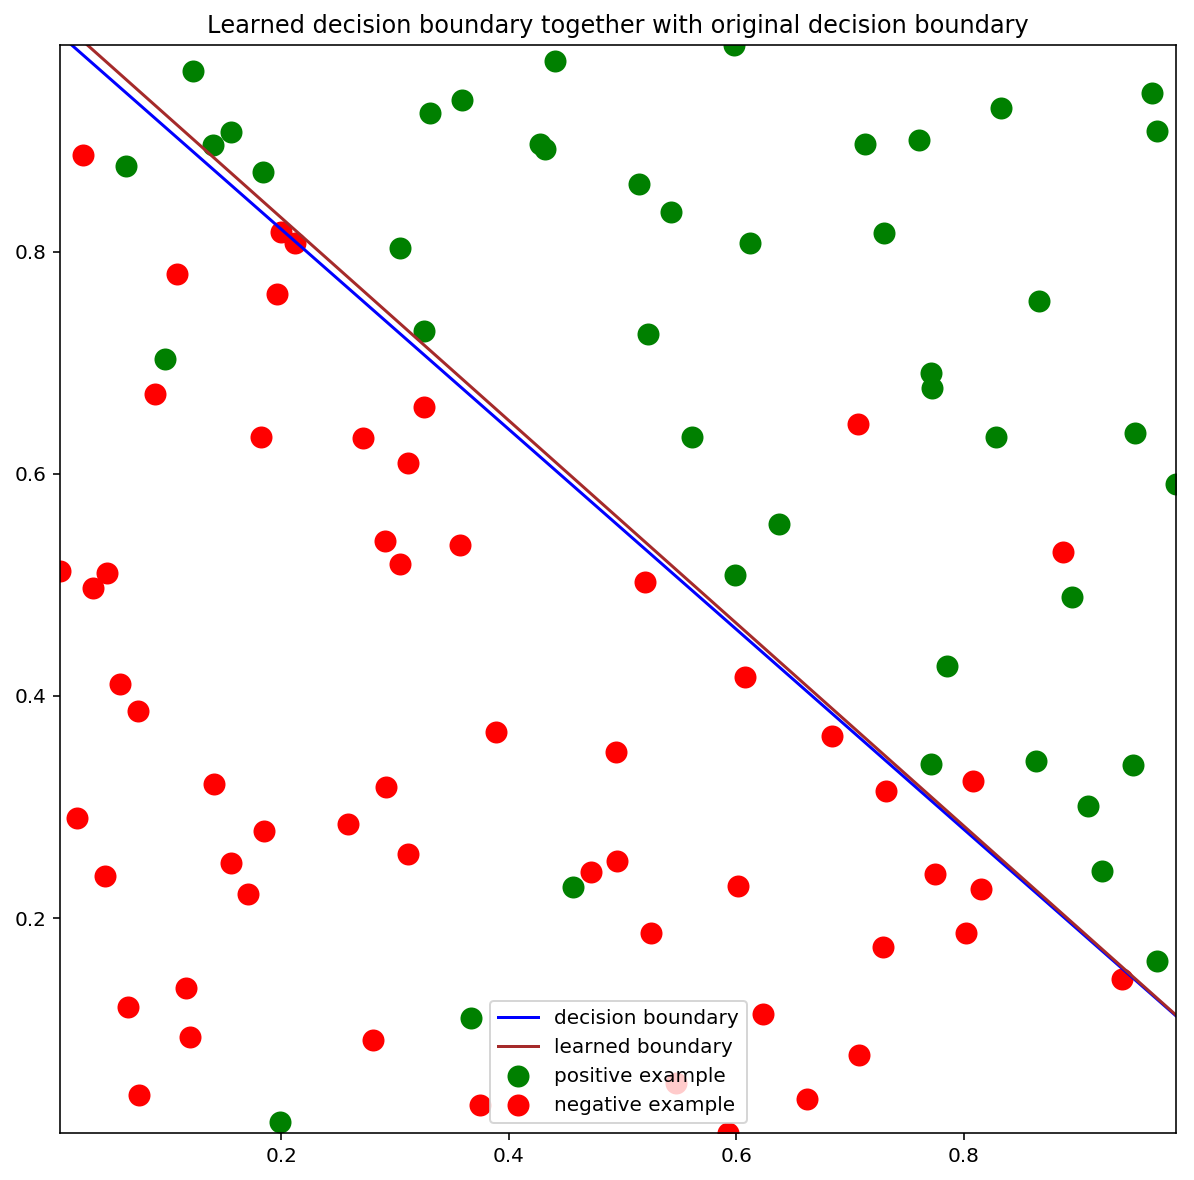

In [9]:
#### line_coef = (-1,0.9,1)


x = np.linspace(0,1)
yy = -line_coef[1]*x - line_coef[0]  
yh = -wp[1]*x - wp[0]

plt.figure(1,figsize=(10,10))
plt.title("Learned decision boundary together with original decision boundary")

plt.scatter(points[pos,1],points[pos,2],c='green',s=100,label="positive example")  #plot positive examples
plt.scatter(points[neg,1],points[neg,2],c='red',s=100,label="negative example")  #plot negative examples
plt.plot(x,yy,'b',label="decision boundary")  #plot linear separator
plt.plot(x,yh,'brown',label="learned boundary")  #plot linear separator
plt.axis([np.min(points[:,1]),np.max(points[:,1]),np.min(points[:,2]),np.max(points[:,2])])
plt.legend()
plt.show()

## Scale

How well does the perceptron scale?  We used it on 35 points.  Could we use it on a million?

What about 35 points that are each million dimensional?

The following code plots the way in which PLA convergence time changes as the number of points increases.

We stick with 3d points.

On average the convergence rate seems okay, but if you comment out this line:

    plt.axis([0,3500,0,100000])

you see that one or two datasets take a very long time to fit.


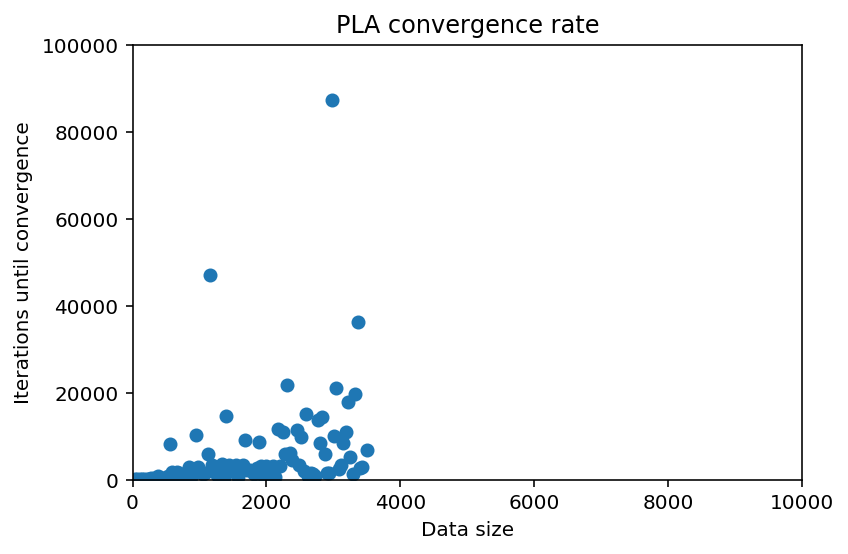

In [10]:
def get_data(N,line_coef=(-1,0.9,1),seed=42):
    np.random.seed(seed)  # So that everyone has the same "random" points
    points = np.zeros(3*N).reshape(N,3)
    points[:,1] = np.random.rand(N) #random x-coordinates
    points[:,2] = np.random.rand(N) #random y-coordinates
    points[:,0] = np.ones(N)        #bias column

    line_coef = (-1,0.9,1)          #this line will define whether a point is a positive or negative example
    pos = points.dot(line_coef) >= 0  # positive examples are above the line
    return points,pos

## This is just like PLA, but also returns the number of iterations
def iter_PLA(X,y,iterations=2000):
    """ 
    X: an Nx(d+1) matrix of datapoints
    y: a Nx1 vector of classifications in {-1,1}
    iterations: the maximum number of iterations
    description:  Applies the perceptron learning algorithm to X,y for given number of iterations
    returns: learned weight vector and number of iterations
    """ 
    
    assert(iterations >= 0)
    w = np.random.rand(X.shape[1]) # random initial weights
    _iterations = 0
    while(_iterations < iterations):
        A = np.sign(X.dot(w))!=y
        if not (np.sign(X.dot(w))==y).all():
            #if a x gets misclassified, update weights
            t = np.argmax(A)
            w= w + y[t]*X[t]
            _iterations += 1
        else:
            break
        pass # something must go here to avoid syntax error
    return w,_iterations

## _N and _I were produced from this code
## This takes a long time to run
## Don't run it -- it's just included for completeness
## But if you do run it, be sure to fill in the missing part of iter_PLA.
"""
k = 100
_N = np.arange(35,35*k+1,35)
_I = np.zeros(k)
for i,n in enumerate(_N):
    X,pos = get_data(n)
    y = 2*pos -1
    w,_I[i] = iter_PLA(X,y,1000000)
"""

##  Loading arrays from saved files
_N = np.load("_N.npy")
_I = np.load("_I.npy")

plt.axis([0,10000,0,100000])
plt.scatter(_N,_I)
plt.xlabel("Data size")
plt.ylabel("Iterations until convergence")
plt.title("PLA convergence rate")
plt.show()

I changed the above to show the convergence as the data size reaches 10,000 points. It seems that after 2000 data points, PLA starts to take longer and longer. Running it on a million points is infeasible. If you do, you might want to wait a couple days before checking back.

### Pocket scaling

Below we examine how the pocket algorithm `E_in` quantity varies if we fix the number of iterations at 2000 (the default) and increase the number of points it must classify.

The best possible performance is about 10% error, because 10% of the points are classified incorrectly by an ideal linear separation.  

In the graph it looks as though things might be improving for bigger datasets (error is going down at around $N=1000$).

Is this real?  

### Part 4
Confirm or disconfirm the idea that pocket accuracy increases with $N$ by extending the plot to have a domain from 0 to 1500.




In [11]:
def get_data_nonlin(N,line_coef=(-1,0.9,1),seed=42):
    np.random.seed(seed)  # So that everyone has the same "random" points
    points = np.zeros(3*N).reshape(N,3)
    points[:,1] = np.random.rand(N) #random x-coordinates
    points[:,2] = np.random.rand(N) #random y-coordinates
    points[:,0] = np.ones(N)        #bias column

    line_coef = (-1,0.9,1)          #this line will define whether a point is a positive or negative example
    pos = points.dot(line_coef) >= 0  # positive examples are above the line
    for i in range(N//10):  # Now we flip about 10% of the data (could be less b/c collisions)
        r = np.random.randint(len(pos))
        pos[r] = ~pos[r]
    return points,pos

_N = np.arange(1,1501,1)
_L = np.zeros(1501-1)
for i,n in enumerate(_N):
    X,pos = get_data_nonlin(n)
    y = 2*pos -1
    w=Pocket_Algorithm(X,y)
    _L[i] = E_in(X,w,y)
    
    

[0.73199394 0.59865848 0.15601864]
[False]
0
Done in 1 iterations
[0.15601864 0.15599452 0.05808361]
[False False]
0
Done in 1 iterations
[-0.94191639  1.06781021 -0.44018332]
[ True False  True]
0
Done in 3 iterations
[-2.39888499  2.71607988  1.6581717 ]
[ True False  True False]
0
Done in 25 iterations
[-0.97941551  0.8194881   1.12156861]
[ True  True False False  True]
0
Done in 3 iterations
[-1.16755736  0.61560725  1.68184281]
[ True False False False  True False]
0
Done in 6 iterations
[-2.81817503  2.36415191  2.78887753]
[False False False  True False  True False]
3
Done in 41 iterations
[-2.69575776  2.54186624  1.53084415]
[ True False  True False  True False False  True]
0
Done in 21 iterations
[-1.56805498 -0.22621825  5.80906872]
[False  True False False  True  True  True False False]
1
Done in 40 iterations
[-4.95333434  6.10218935  2.28451695]
[False False False  True False False False False  True False]
3
Done in 119 iterations
[-2.61753801  2.70286163  3.04121402]
[F

[-2.95354959  2.77629355  2.58388889]
[False  True False False False False False False  True  True False False
 False False]
1
Done in 2000 iterations
[-2.31969246  7.51202813 -6.22719088]
[ True False  True  True False False False False  True False False False
 False False False]
0
Done in 281 iterations
[-0.98673504  1.14383582  0.47956016]
[False False False  True  True False  True False  True False False False
 False False  True False]
3
Done in 2000 iterations
[-4.19160265  2.03738516  6.24799533]
[ True False  True False False False False False False False  True False
 False False False False False]
0
Done in 183 iterations


[-3.98403375  6.95283002  2.86665267]
[False False False False False False False False  True False False  True
 False False False  True  True False]
8
Done in 2000 iterations
[-2.31673648  2.15688475  2.13272125]
[False False False False False False False  True False False False False
 False False  True False False False False]
7
Done in 2000 iterations
[ 0.49517691 -1.11085106 -0.84000934]
[False  True False False False False False  True  True  True False  True
  True  True  True False  True  True  True False]
1
Done in 2000 iterations


[-5.0906796   3.721931    5.71890138]
[False False  True  True  True False False False False False False  True
 False False False False False False  True False False]
2
Done in 152 iterations
[-2.33747772  5.66718178 -1.40078552]
[False False False False False False False  True  True  True False False
 False False False False False  True False False False  True]
7
Done in 2000 iterations


[-0.79205834  0.90806785  0.50257969]
[False False False False False  True False False False False  True False
 False False False  True False False False False False False  True]
5
Done in 2000 iterations
[-0.81514554  0.59504451  0.31906284]
[False False False False False False False  True False  True False False
 False False False False False False False  True False False False False]
7
Done in 2000 iterations


[-3.06050106  3.04318075  2.70797603]
[False False False False False False False False False False False  True
 False  True False False False  True False False False False False False
 False]
11
Done in 2000 iterations
[-1.10517265  0.56372739  1.30800824]
[False False  True False False False False False False  True False False
 False False False False False False False  True False False False False
 False False]
2
Done in 2000 iterations


[-2.67345923  2.22684795  2.71437958]
[False False False False False False False False False False False False
 False  True False  True False False False False False False False False
 False False False]
13
Done in 2000 iterations
[-0.80401714  0.66306173  0.91562577]
[False False  True False False  True  True False False False False  True
 False  True False  True False  True False False  True False  True  True
  True  True False  True]
2
Done in 2000 iterations
[-3.15546615  1.83054333  3.73356455]
[False False False False False False False False False False False False
 False False False False False False False False False False  True False
  True False False False False]
22
Done in 2000 iterations


[-2.46030787  2.26435775  2.46518667]
[False False False False False False False False False False False False
  True False False  True False False False False False False False False
 False False False False False False]
12
Done in 2000 iterations
[-5.03474469  4.28231544  5.24489268]
[False False False False False False False False False False False False
 False False False False False  True False  True False  True  True  True
 False  True False False False False False]
17
Done in 2000 iterations
[-3.72400082  3.65697894  3.68065502]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False]
27
Done in 2000 iterations


[-4.98436359  5.82711374  2.43890953]
[False False False False False False False  True False False False False
 False False  True False False False  True  True False False  True False
 False  True False False  True False False False False]
7
Done in 2000 iterations
[-2.57659852  3.66521174  1.08120536]
[False False  True False False False  True False False False False False
 False False False False  True  True  True  True False  True False False
  True False False False False False False False False False]
2
Done in 2000 iterations
[-4.99447788  6.38619395  3.06141786]
[ True False  True False False False False False False  True False False
 False False False  True  True False False False False False False  True
 False False False False  True False False False False  True False]
0
Done in 2000 iterations


[-1.28865805  0.51685942  1.70753769]
[False False False False False False False False False  True  True  True
  True False False  True  True False False False False False False  True
 False False False False False False False  True False False False False]
9
Done in 2000 iterations
[-4.20982446  3.57902448  4.15794992]
[False False  True False False False False False  True False False False
 False  True False  True False  True False False False False False False
 False False False False  True False False False  True False False False
  True]
2
Done in 2000 iterations
[-0.13689657 -0.10869581  0.20885979]
[False False False False  True False  True False  True False  True  True
 False  True False False  True False False  True False  True  True  True
 False  True  True  True False  True False False False  True False False
  True  True]
4
Done in 2000 iterations


[-2.14996142  1.72008281  2.31708274]
[ True False False False False False False False False False False False
 False False False  True False False False False  True False False False
 False  True  True  True False False False  True False False False False
 False  True  True]
0
Done in 2000 iterations
[-2.66910198  1.71096366  2.8365449 ]
[False  True False  True False False  True False False False False  True
 False  True False  True False False False False False False  True False
 False  True False  True False  True  True False False False False False
  True False False False]
1
Done in 2000 iterations


[-1.33407764  0.69585865  1.40173033]
[ True  True False  True  True False False False False False  True False
 False  True False False False False  True False  True  True  True  True
  True  True  True False False  True  True False False  True False False
 False False False False  True]
0
Done in 2000 iterations
[-2.40870221  1.93079991  3.2016551 ]
[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False False False False False  True False
  True False False  True False False]
22
Done in 2000 iterations


[-2.43875657  2.04498509  2.40394541]
[False False False  True False  True False False False False  True False
 False False False False False  True False False  True  True  True False
 False  True  True False  True False False  True  True False False False
 False  True False False False  True False]
3
Done in 2000 iterations
[-0.88040575 -0.01874915  0.44907397]
[False False  True False  True  True False False False False  True False
 False  True  True  True  True  True False  True  True  True  True False
  True False False  True False  True False  True  True False  True False
 False  True  True  True  True  True  True False]
2
Done in 2000 iterations


[-0.27827048 -0.49600902 -0.2639997 ]
[ True  True False  True  True  True False  True  True  True False False
 False False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True False  True False  True  True False  True
  True  True False False  True  True False  True False]
0
Done in 2000 iterations
[-0.5062044  -0.07592565  0.24268656]
[ True  True  True False  True  True  True  True  True  True False  True
 False  True False False False False False False False  True False False
  True  True False  True  True  True  True False False False  True  True
 False False False False  True  True  True  True False  True]
0
Done in 2000 iterations


[-2.28933711  2.00283564  2.31712885]
[False False False False False False False False  True False False False
 False  True False False False False False False False False False False
 False False  True False False False False False False False False False
 False False  True False False False False False False False False]
8
Done in 2000 iterations
[-1.97458087  1.96942307  1.91723143]
[ True False False False False False  True False False  True False False
 False  True  True  True  True False  True False  True False False  True
  True  True  True False False False  True False  True False False  True
  True False False False  True  True False False  True False False  True]
0
Done in 2000 iterations


[-23.52462978  20.41100333  23.96695471]
[False False False False  True False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False  True
 False False  True False False  True False False False False False False
 False]
4
Done in 2000 iterations
[-0.09243353 -0.34936626 -0.48444443]
[ True  True  True False False  True False False False False False  True
  True False False False False  True False  True  True False False  True
  True  True False False False False  True False False False  True  True
  True False False False False  True False  True  True  True False False
  True False]
0
Done in 2000 iterations


[-1.39558262 -0.48572315  2.45231711]
[False False False  True False False  True  True  True False  True False
 False  True  True  True False  True False False  True False  True False
 False False False  True  True False False False False False False False
 False  True False  True  True False  True False  True False  True False
  True False False]
3
Done in 2000 iterations
[-7.46015891  7.10093063  7.64639117]
[False False False False False False False False  True  True False False
 False False False  True False False False False False  True False False
 False False False False False  True  True False False False False False
  True False  True False  True False False False  True False False False
 False False False False]
8
Done in 2000 iterations


[-3.05714643  2.46849589  3.71708661]
[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False  True False False False False False False  True
 False False False False False False  True False  True False False False
 False False False False False]
22
Done in 2000 iterations
[-1.83877871  1.92197908  1.75930059]
[ True False  True  True False False  True False False  True False False
 False  True False False False  True  True False False False False  True
  True  True False False  True False  True  True False False False  True
 False False False  True False  True False False False  True False False
  True False  True  True False False]
0
Done in 2000 iterations


[-3.19187962  3.23086937  3.05021092]
[False  True False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False  True False False False False False False False False
 False False False False False  True False False False False False False
  True False  True False False False False]
1
Done in 2000 iterations
[-0.54346543 -0.15609968  0.32801745]
[False False False False  True False False  True False  True  True  True
 False  True False  True  True  True  True False  True  True False False
  True  True  True False False  True  True False False  True False  True
  True  True  True False  True  True  True False False  True False False
  True  True  True  True False False False False]
4
Done in 2000 iterations
[-8.78155956  6.91358134 10.22374669]
[False False False False False  True False  True False False False False
 False False False False False False False False False False False False
  True  Tr

[-2.11671974  1.8835451   2.01967994]
[False False False  True  True False False False  True False False False
 False False False  True  True False False  True  True False False  True
  True  True False False False False False  True False False False False
 False False False  True False False False False False False False  True
  True  True False  True False  True False False  True False]
3
Done in 2000 iterations
[-8.64370216  7.86671775  8.58354928]
[False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False  True False  True False  True  True False False False False False
 False False  True False False False False  True False False False False
 False False False False  True False  True False False  True False]
16
Done in 2000 iterations
[-3.72786775  3.27534853  3.77200757]
[False False False  True False False False False False False  True False
 False False  True  True False False False Fal

[-1.18198523 -2.05029954  4.11953051]
[False False  True False  True  True  True False False False  True False
 False  True  True  True False  True False False False  True False  True
  True False False False False  True False  True False False False False
  True False  True False  True  True  True False  True False False False
 False  True  True False False False False False  True False  True False
 False]
2
Done in 2000 iterations
[-8.13926942  7.19150243  8.59677212]
[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False  True False False False  True False False False False
 False False False  True False False False  True  True False False False
 False  True]
12
Done in 2000 iterations


[-0.4892527   0.61904507 -0.21046433]
[False False False  True False  True  True  True  True  True False  True
 False False False False  True  True  True False  True False False  True
  True  True False  True  True False  True False False False False  True
  True False False False  True  True False False False  True  True  True
  True  True  True False  True  True  True  True False False False False
  True False False]
3
Done in 2000 iterations
[-3.77789219  3.50651486  3.2284227 ]
[False False  True False False  True False False  True False False False
 False False False False False False  True False  True False  True  True
 False False  True False False False False False False False  True  True
 False False False  True False  True False False False  True False  True
 False  True False False False  True False False False False False False
 False  True False False]
2
Done in 2000 iterations


[-2.0570903   1.70061367  2.18810114]
[False False False False False False False False  True False False False
 False False False False False False False False False False False  True
 False False False False  True False  True False False False False False
  True False  True False False False False False False False False False
 False False  True False  True False  True False  True False False False
 False  True False False False]
8
Done in 2000 iterations
[-4.6363704   4.15651697  4.56498455]
[False False False False False False False False False False False False
  True False  True False False False False False False False False  True
 False False False  True False False  True  True False False False False
 False False False False False False False  True False False False False
 False  True  True  True False False False False False False  True False
 False False False False False False]
12
Done in 2000 iterations


[-11.75312394  10.07800294  11.85378006]
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True  True False False False False
 False  True False False False False False False False False False False
 False  True False False False False False False False  True  True False
 False  True False False False False False]
19
Done in 2000 iterations
[-3.50275149  3.2147789   3.51748543]
[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False  True False False False False  True False]
23
Done in 2000 iterations


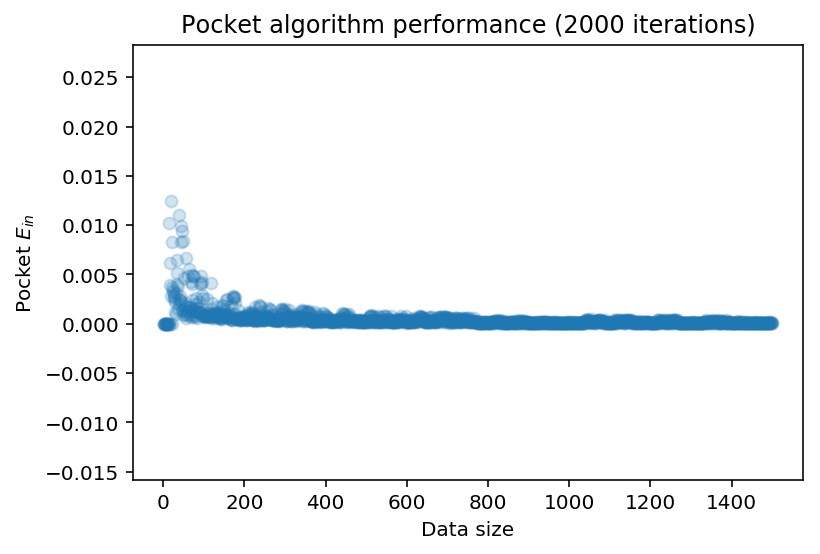

In [12]:
plt.scatter(_N,_L,alpha=0.2)
plt.xlabel("Data size")
plt.ylabel(r"Pocket $E_{in}$")
plt.title("Pocket algorithm performance (2000 iterations)")
plt.show()

After changing the boundary to 1500, the line looks similar as if the boundary was 1000. Therefore, there is no valid proof here that pocket accuracy increases as N increases.Looking at the data, it seems to do best when N is less than 400.

### Real data

We now examine how the pocket algorithm performs on a real dataset.

The dataset we use is described here: 
    
[https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

You should read the [dataset description](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names).  

For the first exercise we reduce the problem to two dimensions by considering only columns 8 and 20 of the dataset.

This throws away information and will reduce accuracy, but it has the advantage of letting us see what's happening in a 2d graph.

### Part 5

What are the meanings of columns 8 and 20 according to the dataset description?

Update the image produced below to have the relevant information on the relevant axes.  

Use `xlabel` and `ylabel` as in the above plot.  
        

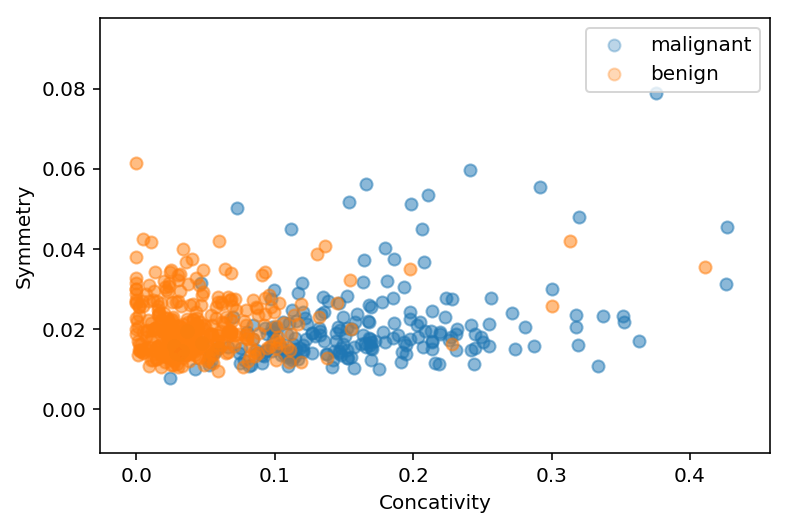

In [13]:
### Real data
D = np.loadtxt(open("num_data.txt", "rb"), delimiter=",", skiprows=0)


x  = D[:,8]
y  = D[:,20]

malignant = D[:,1]==1  ## Column 1 represents benign (0) or malignant (1)
xm = x[malignant]
ym = y[malignant]

benign = D[:,1]==0
xb = x[benign]
yb = y[benign]

plt.scatter(xm,ym,label="malignant",alpha=0.3)
plt.scatter(xb,yb,label="benign",alpha=0.3)
plt.xlabel("Concativity")
plt.ylabel("Symmetry")

plt.legend()
plt.show()



### Part 6

Below we use the pocket algorithm to find a linear separator `w` for the breast cancer data and then output its `E_in`.

What is the accuracy?  That is, what percentage of the datapoints does the classifier `w` classify correctly?

Change the code below so that the accuracy is printed as well as `E_in`.  

In [14]:
X = np.ones(D.shape[0]*3).reshape(D.shape[0],3)
X[:,1] = D[:,8]
X[:,2] = D[:,20]

y = 2*malignant -1  # so that y in {-1,1}, not {0,1}


w = Pocket_Algorithm(X,y,2000)
wp = w/w[-1]  # dividing out c as described in comments to first code cell


Ething = E_in(X,w,y)
acc = (1 - Ething) * 100
print(f"Ein = {Ething} and Accuracy = {acc}%")

[-0.25161565  3.23232866 -2.08324903]
[False  True False ... False False False]
1
Done in 2000 iterations
Ein = 9.420529341088025e-05 and Accuracy = 99.99057947065891%


In the plot below we visualize the learned decision boundary.


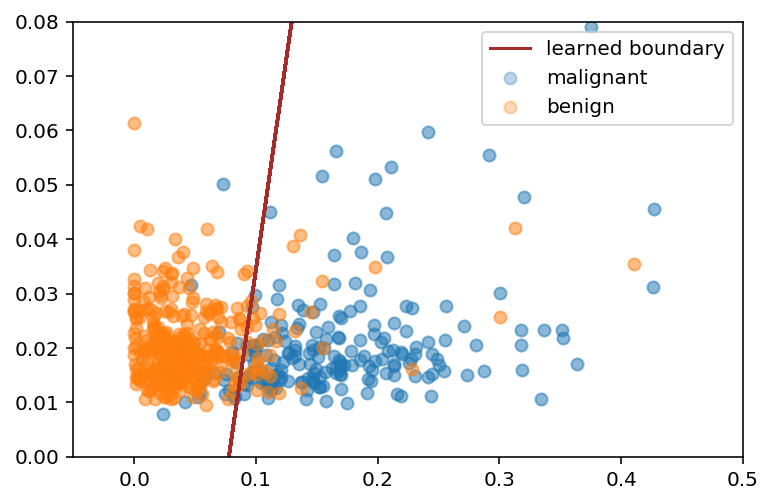

In [15]:
plt.scatter(xm,ym,label="malignant",alpha=0.3)
plt.scatter(xb,yb,label="benign",alpha=0.3)

yh = -wp[1]*X[:,1] - wp[0]
plt.plot(x,yh,'brown',label="learned boundary")  #plot linear separator
plt.axis([-0.05,0.5,0,.08])
plt.legend()
plt.show()

### Alternative error measures

The pocket algorithm uses so-called "hinge loss" meaning a correct classification has a "loss" of 0 and an incorrect classification has a "loss" of 1.
Then `E_in` is the average loss.

But in reality different kinds of error incur different costs.  

An error may result from either a false positive, or a false negative.

## Part 7

For the cancer data should false positives and false negatives be weighted equally?

Why or why not?  What happens to the patient in the case of a false negative?

What happens in the case of a false positive?


No, false positives and false negatives should NOT be weighted equally.

A false positive isn't as drastic as a false negative. Someone who is a false positive might be scared that they actually have cancer, but when more scientific analysis is done on them, they won't have it. The worst case scenario here for a false positive is a scare.

Someone who is a false negative will believe they're okay, but then they'll just get worse and worse. Eventually, it might be too late for them. The worst case scenario here is death.

Therefore, false negatives should be weighed more, such as 100.
False positives should be weight as something like 1.


---

The following two plots show what happens when we use a different error measure `E_cancer` (described below) with the pocket algorithm.



### Part 8

Complete the `E_cancer` function by adding a return statement.

The function should return average loss where:

1. the loss resulting from a correct classification is 0
2. the loss resulting from a false negative is 10
3. the loss resulting from a false positive is 1

### Part 9 

Suppose $w_{hinge}$ is the boundary learned by `Pocket_Algorithm(X,y)` and $w_{cancer}$ is the boundary learned by `Pocket_Algorithm(X,y,E_in=E_cancer)` (see below).

Accuracy is the percentage of sample points classified correctly.

What is the accuracy of the boundary $w_{hinge}$? 

What is the accuracy of $w_{cancer}$?

[-0.74128836  8.20248332 -0.87681218]
[False False False ... False False False]
10
Done in 2000 iterations


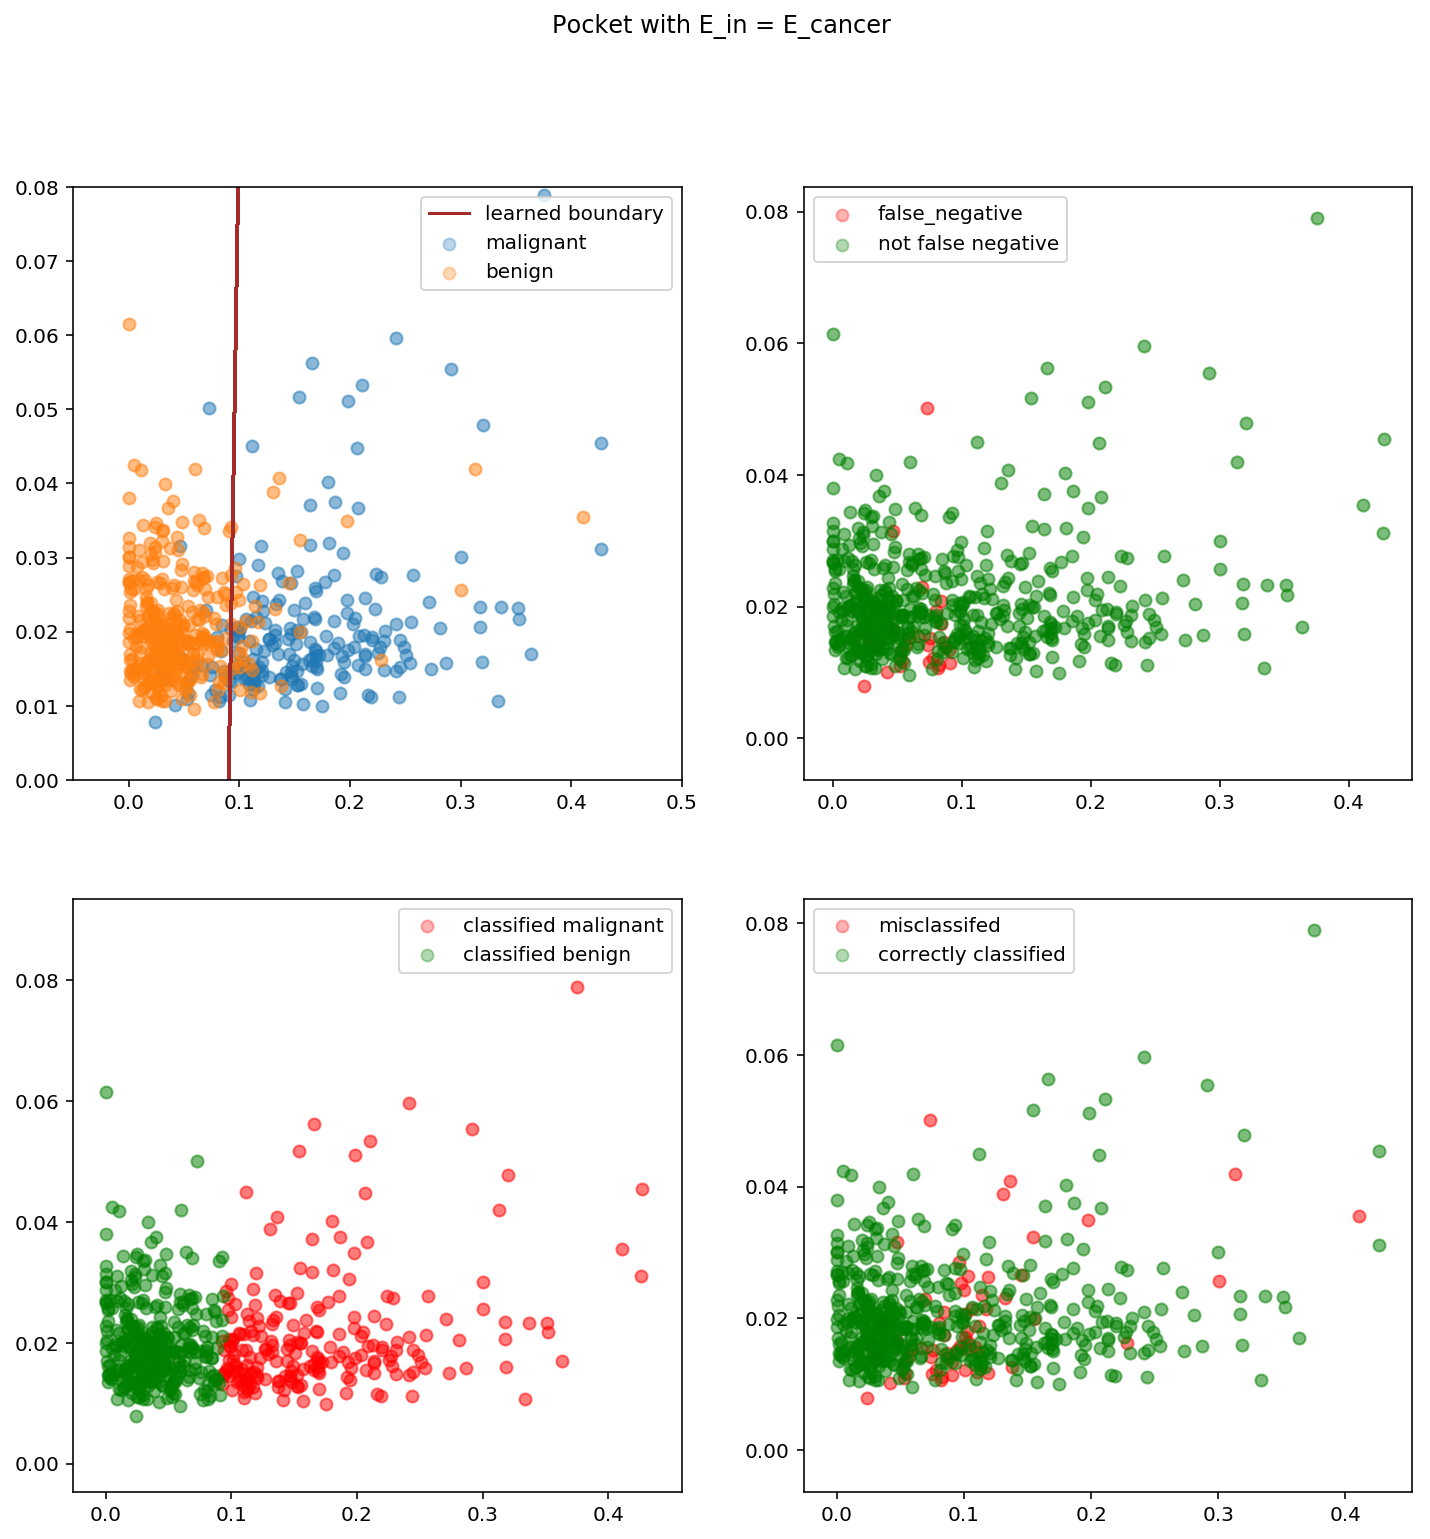

In [16]:
def E_cancer(X,w,y):
    """
    false negatives are 10 times worse than false positives
    """
    misclassified = (np.sign(X.dot(w)) != y)
    malignant = (y==1)
    false_negative = misclassified & malignant
    false_positive = misclassified & (~malignant)
    wee = [0,10,1]
    
    return X, wee,(1/len(X)) * np.mean(misclassified)


x  = D[:,8]
y  = D[:,20]

malignant = D[:,1]==1
xm = x[malignant]
ym = y[malignant]

benign = D[:,1]==0
xb = x[benign]
yb = y[benign]

X = np.ones(D.shape[0]*3).reshape(D.shape[0],3)
X[:,1] = D[:,8]
X[:,2] = D[:,20]

y = 2*malignant -1

w = Pocket_Algorithm(X,y,E_in = E_cancer)
wp = w/w[-1]  # dividing out c as described in comments to first code cell


fig,axes = plt.subplots(2,2,figsize=(12,12))
fig.suptitle("Pocket with E_in = E_cancer")
axes[0,0].scatter(xm,ym,label="malignant",alpha=0.3)
axes[0,0].scatter(xb,yb,label="benign",alpha=0.3)

yh = -wp[1]*X[:,1] - wp[0]
axes[0,0].plot(x,yh,'brown',label="learned boundary")  #plot linear separator
axes[0,0].axis([-0.05,0.5,0,.08])
axes[0,0].legend()

misclassified = (np.sign(X.dot(w)) != y)
malignant = (y==1)
false_negative = misclassified*malignant
false_positive = misclassified*(~malignant)

xfn = X[false_negative][:,1]
yfn = X[false_negative][:,2]
xb = X[~false_negative][:,1]
yb = X[~false_negative][:,2]
axes[0,1].scatter(xfn,yfn,label="false_negative",alpha=0.3,color='red')
axes[0,1].scatter(xb,yb,label="not false negative",alpha=0.3,color='green')
axes[0,1].legend()

classified_mal = np.sign(X.dot(w))==1
x_mal = X[classified_mal][:,1]
y_mal = X[classified_mal][:,2]

x_ben = X[~classified_mal][:,1]
y_ben = X[~classified_mal][:,2]

axes[1,0].scatter(x_mal,y_mal,label="classified malignant",alpha=0.3,color='red')
axes[1,0].scatter(x_ben,y_ben,label="classified benign",alpha=0.3,color='green')
axes[1,0].legend()

x_mcl = X[misclassified][:,1]
y_mcl = X[misclassified][:,2]

x_ccl = X[~misclassified][:,1]
y_ccl = X[~misclassified][:,2]

axes[1,1].scatter(x_mcl,y_mcl,label="misclassifed",alpha=0.3,color='red')
axes[1,1].scatter(x_ccl,y_ccl,label="correctly classified",alpha=0.3,color='green')
axes[1,1].legend()

plt.show()

#print((1- E_cancer)*100)
#print((1-E_in) * 100)
#wcancer will be way more accurate than whinge because wcancer's weights are more punishing, meaning that they assign how much false negatives and positives should weigh

wcancer

[-0.99094584 11.04339399 -1.53545832]
[False False False ... False False False]
10
Done in 2000 iterations


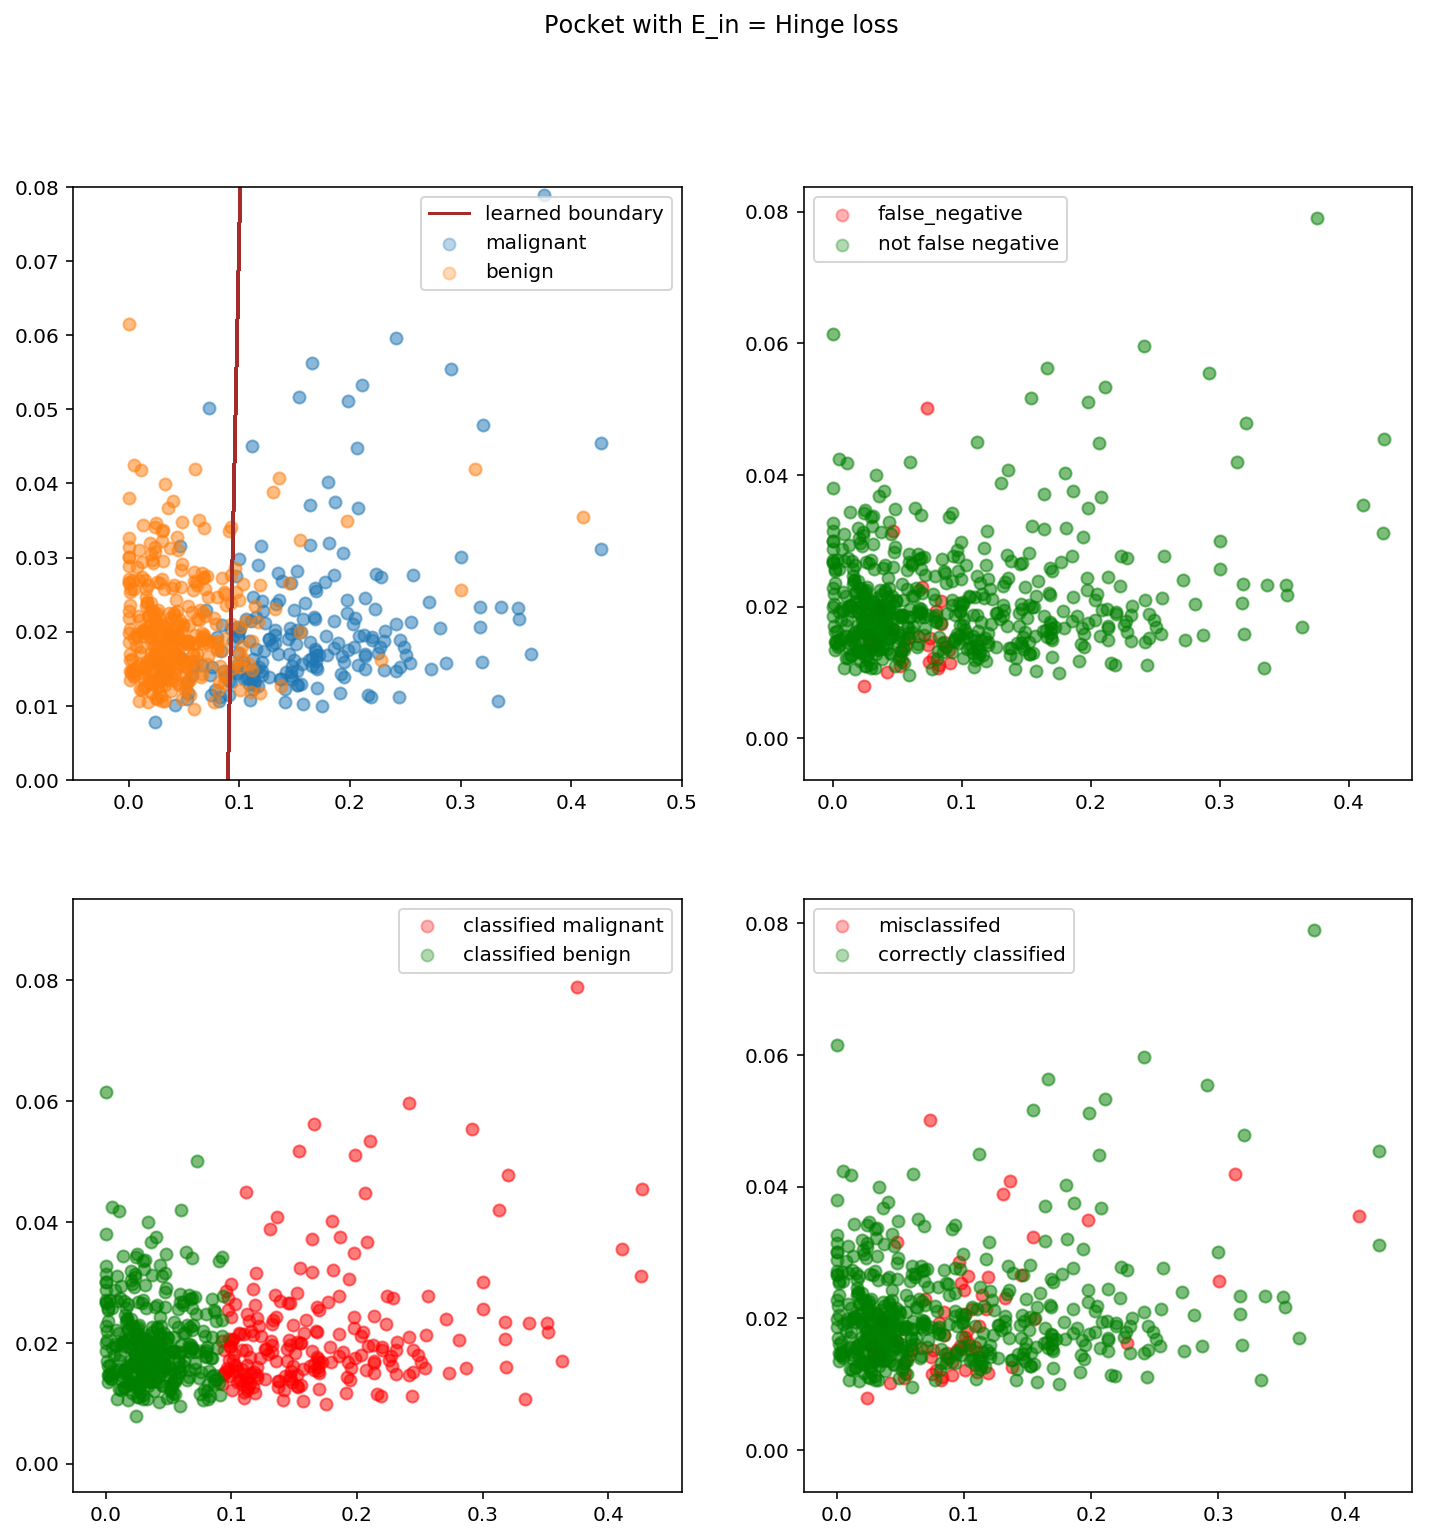

In [17]:

x  = D[:,8]
y  = D[:,20]

malignant = D[:,1]==1
xm = x[malignant]
ym = y[malignant]

benign = D[:,1]==0
xb = x[benign]
yb = y[benign]

X = np.ones(D.shape[0]*3).reshape(D.shape[0],3)
X[:,1] = D[:,8]
X[:,2] = D[:,20]

y = 2*malignant -1

w = Pocket_Algorithm(X,y)
                    
wp = w/w[-1]  # dividing out c as described in comments to first code cell


fig,axes = plt.subplots(2,2,figsize=(12,12))
fig.suptitle("Pocket with E_in = Hinge loss")                       
axes[0,0].scatter(xm,ym,label="malignant",alpha=0.3)
axes[0,0].scatter(xb,yb,label="benign",alpha=0.3)

yh = -wp[1]*X[:,1] - wp[0]
axes[0,0].plot(x,yh,'brown',label="learned boundary")  #plot linear separator
axes[0,0].axis([-0.05,0.5,0,.08])
axes[0,0].legend()

misclassified = (np.sign(X.dot(w)) != y)
malignant = (y==1)
false_negative = misclassified*malignant
false_positive = misclassified*(~malignant)

xfn = X[false_negative][:,1]
yfn = X[false_negative][:,2]
xb = X[~false_negative][:,1]
yb = X[~false_negative][:,2]
axes[0,1].scatter(xfn,yfn,label="false_negative",alpha=0.3,color='red')
axes[0,1].scatter(xb,yb,label="not false negative",alpha=0.3,color='green')
axes[0,1].legend()

classified_mal = np.sign(X.dot(w))==1
x_mal = X[classified_mal][:,1]
y_mal = X[classified_mal][:,2]

x_ben = X[~classified_mal][:,1]
y_ben = X[~classified_mal][:,2]

axes[1,0].scatter(x_mal,y_mal,label="classified malignant",alpha=0.3,color='red')
axes[1,0].scatter(x_ben,y_ben,label="classified benign",alpha=0.3,color='green')
axes[1,0].legend()

x_mcl = X[misclassified][:,1]
y_mcl = X[misclassified][:,2]

x_ccl = X[~misclassified][:,1]
y_ccl = X[~misclassified][:,2]

axes[1,1].scatter(x_mcl,y_mcl,label="misclassifed",alpha=0.3,color='red')
axes[1,1].scatter(x_ccl,y_ccl,label="correctly classified",alpha=0.3,color='green')
axes[1,1].legend()

plt.show()


### Full dimensionality

How much better is the pocket algorithm when we use the full dataset, rather than two columns?

If the following breaks your code then your `Pocket_Algorithm` has problems (assumptions about dimensionality?)


In [18]:
X = np.ones(D.shape[0]*(D.shape[1]-1)).reshape(D.shape[0],D.shape[1]-1)
X[:,1:] = D[:,2:]
y = 2*D[:,1]-1

In [19]:
w = Pocket_Algorithm(X,y)

[-4.13623118e+01 -3.66377978e+02 -4.39165947e+02 -2.23630861e+03
 -2.85020073e+03 -3.31044995e+00  8.05231507e-02  9.68985554e-01
 -1.06037396e-02 -7.18719352e+00 -1.93503367e+00  5.65435977e+00
 -1.39610737e+01  5.27749405e+01  1.52167273e+03  1.98641725e-01
  9.05591669e-01  3.53291785e-02  6.87730710e-01  2.31451834e-01
  8.34456318e-01 -3.62937016e+02 -6.49787289e+02 -2.25545575e+03
  2.65020028e+03 -6.05181639e+00 -1.62151851e+00 -4.35288261e+00
 -2.91375098e+00 -1.19431413e+01 -2.07988706e+00]
[False False False ...  True False  True]
3
Done in 2000 iterations


In [20]:
E_in(X,w,y)

7.876180268778512e-05

Below is the linear boundary found by linear classification (to be discussed soon).

Note that it's faster and better than the perceptron (sorry perceptron -- you're still useful for building neural networks).

In [21]:
w = np.linalg.pinv(X).dot(y)
E_in(X,w,y)

3.0886981446190243e-05

The pocket algorithm performs way better when using all of the columns to make a decision. The in-sample error is lower using the Pocket Algorithm with all the data while using two columns is higher.